In [5]:
import sys
sys.path.append('../src/')
import pandas as pd
import auto_co2 as co2
from auto_co2.agg import CountryDataAggregator, ManufacturerDataAggregator, CarDataAggregator
import importlib
importlib.reload(co2)


# Looks for csv file, or looks for archive, or downloads and unzips the archive, then loads the csv
df = co2.data.download_and_load_co2_data()
#df = co2.data.dataviz_preprocess(df)

File ../data/raw/auto_co2_eur_21_raw.csv not found, searching archive file...
Archive file ../data/raw/automobile-co2-emissions-eu-2021.zip not found, downloading...
File has been downloaded to ../data/raw/automobile-co2-emissions-eu-2021.zip.
Download complete! Unzipping...
Loading data into a Pandas DataFrame...


In [3]:
df[df['Country'].isin(['FR', 'DE'])].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4308011 entries, 50000 to 9920107
Data columns (total 38 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   MMS                   float64
 7   Tan                   object 
 8   T                     object 
 9   Va                    object 
 10  Ve                    object 
 11  Mk                    object 
 12  Cn                    object 
 13  Ct                    object 
 14  Cr                    object 
 15  r                     int64  
 16  m (kg)                float64
 17  Mt                    float64
 18  Enedc (g/km)          float64
 19  Ewltp (g/km)          float64
 20  W (mm)                float64
 21  At1 (mm)              float64
 22  At2 (mm)              float64
 23  Ft      

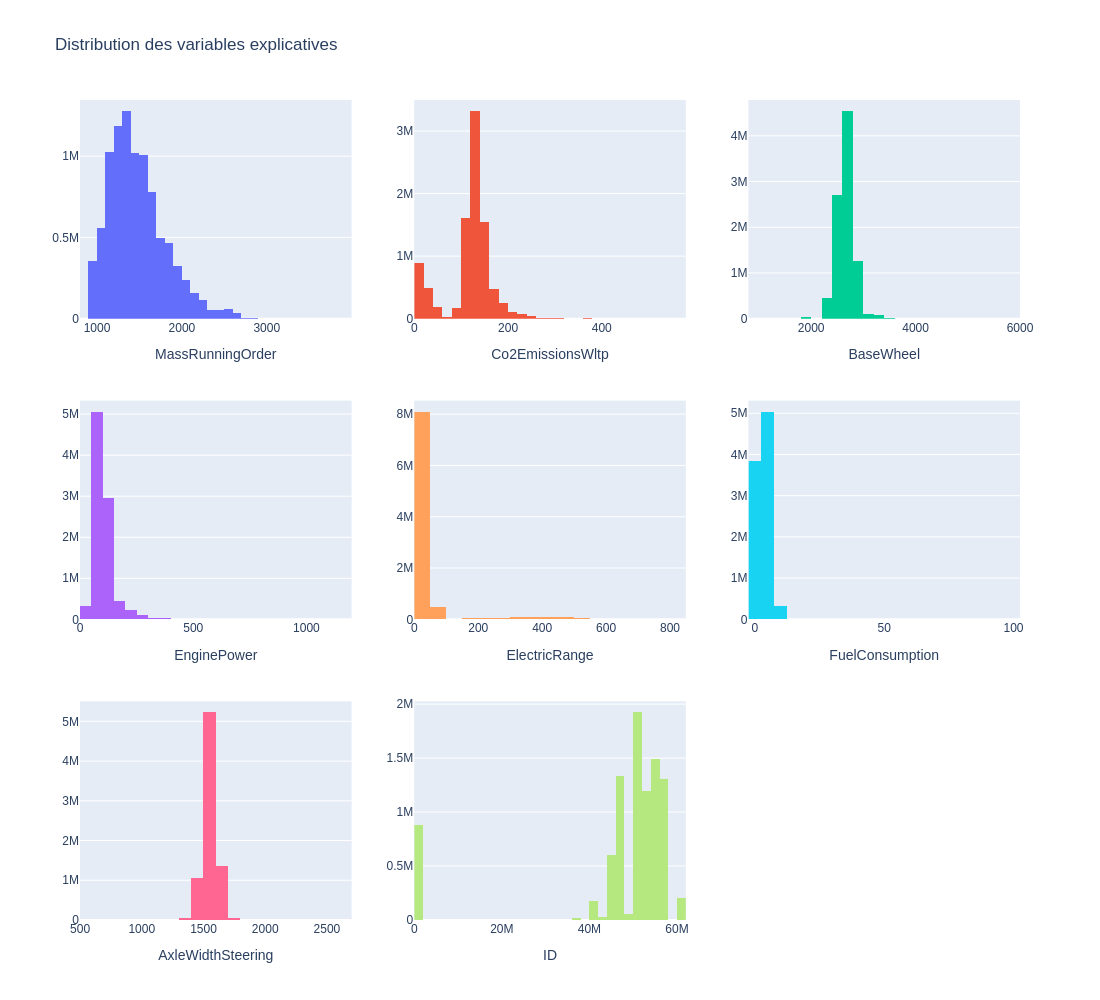

Saved static figure to output/figures/Distribution_des_variables_explicatives__20240126_120429.png


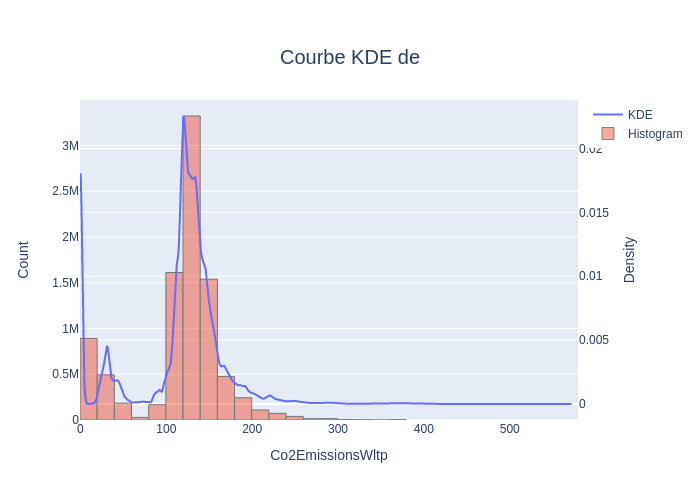

Saved static figure to output/figures/Courbe_KDE_de__20240126_120706.png


In [2]:
co2.viz.plot_feature_distributions(df, interactive=False, save=True)
co2.viz.plot_continuous_distribution(s=df['Co2EmissionsWltp'], interactive=False, save=True)

In [3]:
co2.styles.displayer(df) 

Save: True
Saved None styled DataFrame to output/tables


,Make,RegistrationDate,CommercialName,MassRunningOrder,Co2EmissionsWltp,BaseWheel,EnginePower,InnovativeTechnology,ElectricRange,Pool,FuelType,FuelConsumption,Country,AxleWidthSteering,ID,Co2Grade
0,SEAT,2021-01-11,LEON,1448.000,118.000,2669.000,110.000,e9 28 29,0.000,VW-SAIC,DIESEL,4.500,ES,1550.000,295039,B
1,VOLKSWAGEN,2021-05-18,T-ROC,1294.000,137.000,2590.000,81.000,E13 28 29,0.000,VW-SAIC,PETROL,6.100,ES,1546.000,295040,C
2,FORD,2021-03-24,KUGA,1687.000,135.000,2710.000,110.000,nan,0.000,FORD,DIESEL,0.000,ES,1596.000,295041,C
3,VOLKSWAGEN,2021-05-18,T-ROC,1294.000,137.000,2590.000,81.000,E13 29,0.000,VW-SAIC,PETROL,6.100,ES,1546.000,295042,C
4,OPEL,2021-02-25,GRANDLAND,1395.000,140.000,2675.000,96.000,nan,0.000,STELLANTIS,PETROL,6.200,ES,1595.000,295043,C


<class 'pandas.io.formats.style.Styler'>


In [4]:
countries = CountryDataAggregator(df)
countries.display_sorted(n=5, by='ElectricRange', 
                         title="Top 5 des pays par capacité de propulsion électrique (moyenne kms)")
countries.countrywise_viz(save=True, format='png')

Save: True
Saved Top 5 des pays par capacité de propulsion électrique (moyenne kms) styled DataFrame to output/tables


,Country,Population,GdpPerCapita,Count,Make,FuelType,FuelConsumption,EnginePower,Co2EmissionsWltp,MassRunningOrder,BaseWheel,AxleWidthSteering,ElectricRange
24,SE,10548336.000,60375.043,242815,TOYOTA,PETROL,0.000,129.760,84.373,1657.117,2710.148,1566.901,107.509
20,NL,17100715.000,48569.467,295609,OPEL,PETROL,0.000,103.796,95.951,1462.551,2641.914,1541.163,86.139
6,DK,5827463.000,68349.344,174823,VOLKSWAGEN,PETROL,0.000,109.253,93.109,1537.632,2657.591,1547.964,70.170
0,AT,8979894.000,53493.772,235320,MERCEDES-BENZ,PETROL,0.000,99.223,116.045,1536.863,2682.952,1554.201,61.190
17,LU,660809.000,129396.306,38895,TOYOTA,PETROL,0.000,121.268,122.738,1584.892,2685.337,1565.446,52.063


<class 'pandas.io.formats.style.Styler'>


Saved static figure to output/figures/Quel_pays_ach_te_les_v_hicules_les_plus_polluants___CO2__20240126_120715.png


Saved static figure to output/figures/Quel_pays_ach_te_les_v_hicules_les_plus_puissants___KWh__20240126_120715.png


Saved static figure to output/figures/Quel_pays_ach_te_les_v_hicules_les_plus_lourds___Kg__20240126_120715.png


In [5]:
makers = ManufacturerDataAggregator(df, dropna=False)
makers.display_sorted(by='MarketShare(%)', n=8, title="Top 8 marques en Europe (2021)")

Save: True
Saved Top 8 marques en Europe (2021) styled DataFrame to output/tables


,,Count,MarketShare(%),FuelType,FuelConsumption,EnginePower,Co2EmissionsWltp,MassRunningOrder,BaseWheel,AxleWidthSteering,ElectricRange
Pool,Make,,,,,,,,,,
VW-SAIC,VOLKSWAGEN,1083238,11.750,PETROL,3.645,99.586,118.852,1500.673,2658.815,1535.808,28.593
RENAULT-NISSAN-MITSUBISHI,RENAULT,659267,7.150,PETROL,3.376,73.879,103.611,1359.589,2629.590,1529.680,31.315
MAZDA-SUBARU-SUZUKI-TOYOTA,TOYOTA,604083,6.550,PETROL,3.183,86.641,112.269,1393.690,2619.556,1538.775,2.449
BMW,BMW,532425,5.780,DIESEL,3.671,147.181,120.283,1779.638,2792.859,1592.661,29.157
MERCEDES-BENZ,MERCEDES-BENZ,498702,5.410,DIESEL,3.462,147.311,124.234,1861.228,2860.095,1614.263,41.753
VW-SAIC,SKODA,488791,5.300,PETROL,3.556,99.807,116.403,1452.080,2657.396,1531.047,25.755
STELLANTIS,PEUGEOT,457512,4.960,PETROL,2.255,87.219,113.035,1372.182,2640.956,1551.237,19.127
VW-SAIC,AUDI,450568,4.890,PETROL,3.842,142.205,124.484,1731.724,2741.680,1579.339,30.420


<class 'pandas.io.formats.style.Styler'>


In [6]:
makers.plot_popular_pool_brands(save=True, format='png')   

Saved static figure to output/figures/R_partition_des_immatriculation_par_marque_et_groupe_automobile_20240126_120717.png


In [7]:
makers.plot_mass_engine_scatter(save=True, format='html')

Saved static figure to output/figures/Comparaison_de_la_masse_et_de_la_puissance_des_v_hicules__KW__20240126_120717.png


In [8]:
makers.facetplot()

Saved static figure to output/figures/untitled_20240126_120717.png


In [9]:
cars = CarDataAggregator(df)

# UTILISATION DE DISPLAY SORTED
# Concaténation feature + _Stat ex BaseWheel_Min pour critère de tri, puis filtrer les colonnes avec stats=['Min', 'Max']
# Si stats n'est pas renseigné, toutes les colonnes sont affichées
cars.display_sorted(by='Co2EmissionsWltp_Max', stats=['Max'], n=10, ascending=False, title="Top 10 des voitures les plus polluantes (WLTP)")
cars.display_sorted(by='Co2EmissionsWltp_Min', stats=['Min'], n=10, ascending=True, title="Top 10 des voitures les moins polluantes (WLTP)")

Save: True
Saved Top 10 des voitures les plus polluantes (WLTP) styled DataFrame to output/tables


<class 'pandas.io.formats.style.Styler'>
Save: True
Saved Top 10 des voitures les moins polluantes (WLTP) styled DataFrame to output/tables


<class 'pandas.io.formats.style.Styler'>


FuelConsumption_Min  EnginePower_Min  \
Make    CommercialName                                                         
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC                0.000           80.000   
BMW     I3 EDRIVE BEV I01 IB1                         0.000           75.000   
        I3 / / AUT                                    0.000           75.000   
        I3                                            0.000           75.000   
        I 3S                                          0.000          135.000   
HYUNDAI KAUAI                                         0.000           77.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV                0.000          225.000   
        IONIQ5 / 160KW / 2WD EV                       0.000          160.000   
        IONIQ5                                        0.000           42.000   
        IONIQ 5                                       0.000          124.000   

                                        Co2EmissionsWltp_Min  \
Make    CommercialName                                         
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC                 0.000   
BMW     I3 EDRIVE BEV I01 IB1                          0.000   
        I3 / / AUT                                     0.000   
        I3                                             0.000   
        I 3S                                           0.000   
HYUNDAI KAUAI                                          0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV                 0.000   
        IONIQ5 / 160KW / 2WD EV                        0.000   
        IONIQ5                                         0.000   
        IONIQ 5                                        0.000   

                                        MassRunningOrder_Min  BaseWheel_Min  \
Make    CommercialName                                                        
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC              1720.000       2655.000   
BMW     I3 EDRIVE BEV I01 IB1                       1345.000       2570.000   
        I3 / / AUT                                  1345.000       2570.000   
        I3                                          1320.000       2570.000   
        I 3S                                        1365.000       2570.000   
HYUNDAI KAUAI                                       1298.000       2600.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV              2175.000       3000.000   
        IONIQ5 / 160KW / 2WD EV                     2065.000       3000.000   
        IONIQ5                                      1905.000       3000.000   
        IONIQ 5                                     1919.000       3000.000   

                                        AxleWidthSteering_Min  \
Make    CommercialName                                          
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC               1565.000   
BMW     I3 EDRIVE BEV I01 IB1                        1571.000   
        I3 / / AUT                                   1602.000   
        I3                                           1570.000   
        I 3S                                         1592.000   
HYUNDAI KAUAI                                        1564.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV               1628.000   
        IONIQ5 / 160KW / 2WD EV                      1628.000   
        IONIQ5                                       1628.000   
        IONIQ 5                                      1628.000   

                                        ElectricRange_Min  
Make    CommercialName                                     
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC            200.000  
BMW     I3 EDRIVE BEV I01 IB1                     285.000  
        I3 / / AUT                                287.000  
        I3                                          0.000  
        I 3S                                      280.000  
HYUNDAI KAUAI                                       0.000  
        IONIQ5 / 70KW+154,6KW / 4WD EV            403.000  
        IONIQ5 / 160KW / 2WD EV         

In [10]:
# UTILISATION DE SPECS: 
# Toutes statistiques
cars.specs(['TWINGO', 'CLIO', 'MEGANE'])

# Sélection de statistiques
cars.specs(['GOLF', 'CAYENNE', 'T-ROC'], stats=['Q1', 'Median', 'Q3'])

Save: True
Saved None styled DataFrame to output/tables


Make,TWINGO,CLIO,MEGANE
CommercialName_Size,59168,183204,59098
Pool,RENAULT-NISSAN-MITSUBISHI,RENAULT-NISSAN-MITSUBISHI,RENAULT-NISSAN-MITSUBISHI
--------,--------,--------,--------
FuelType_Mode,PETROL,PETROL,DIESEL
FuelConsumption_Min,0.000000,0.000000,0.000000
FuelConsumption_Q1,0.000000,4.100000,0.000000
FuelConsumption_Median,0.000000,5.100000,4.600000
FuelConsumption_Mean,2.263566,4.005492,3.304579
FuelConsumption_Q3,5.200000,5.200000,4.700000
--------,--------,--------,--------


<class 'pandas.io.formats.style.Styler'>
Save: True
Saved None styled DataFrame to output/tables


Make,GOLF,CAYENNE,T-ROC
FuelConsumption_Q1,0.000000,9.300000,4.400000
FuelConsumption_Median,4.700000,11.300000,5.400000
FuelConsumption_Q3,5.500000,11.500000,6.500000
EnginePower_Q1,85.000000,250.000000,81.000000
EnginePower_Median,96.000000,250.000000,110.000000
EnginePower_Q3,110.000000,250.000000,110.000000
Co2EmissionsWltp_Q1,121.000000,259.000000,137.000000
Co2EmissionsWltp_Median,124.000000,261.000000,146.000000
Co2EmissionsWltp_Q3,130.000000,266.000000,152.000000
MassRunningOrder_Q1,1331.000000,2060.000000,1332.000000


<class 'pandas.io.formats.style.Styler'>


In [11]:
cars.display()

Save: True
Saved None styled DataFrame to output/tables


<class 'pandas.io.formats.style.Styler'>


CommercialName_Size        Pool  \
Make   CommercialName                                                  
ABARTH 500 / 1.4 / 595                                 8  STELLANTIS   
       500 / 1.4 / 595 COMPETIZIONE                    4  STELLANTIS   
       500 / 1.4 / 595 TURISMO                         5  STELLANTIS   
AIWAYS U5                                           1039     VW-SAIC   
       U5 /                                            2     VW-SAIC   
...                                                  ...         ...   
ŠKODA  OCTAVIA                                      4631     VW-SAIC   
       OCTAVIA RS                                    287     VW-SAIC   
       OCTAVIA SCOUT                                 100     VW-SAIC   
       SCALA                                        2298     VW-SAIC   
       SUPERB                                       1165     VW-SAIC   

                                    FuelType_Mode  FuelConsumption_Min  \
Make   CommercialName                                                    
ABARTH 500 / 1.4 / 595                     PETROL                6.800   
       500 / 1.4 / 595 COMPETIZIONE        PETROL                6.900   
       500 / 1.4 / 595 TURISMO             PETROL                6.800   
AIWAYS U5                                ELECTRIC                0.000   
       U5 /                              ELECTRIC                0.000   
...                                           ...                  ...   
ŠKODA  OCTAVIA                             DIESEL                0.000   
       OCTAVIA RS                          PETROL                0.000   
       OCTAVIA SCOUT                       DIESEL                0.000   
       SCALA                               PETROL                0.000   
       SUPERB                              DIESEL                0.000   

                                     FuelConsumption_Q1  \
Make   CommercialName                                     
ABARTH 500 / 1.4 / 595                            6.800   
       500 / 1.4 / 595 COMPETIZIONE               6.900   
       500 / 1.4 / 595 TURISMO                    6.800   
AIWAYS U5                                         0.000   
       U5 /                                       0.000   
...                                                 ...   
ŠKODA  OCTAVIA                                    0.000   
       OCTAVIA RS                                 0.000   
       OCTAVIA SCOUT                              0.000   
       SCALA                                      0.000   
       SUPERB                                     0.000   

                                     FuelConsumption_Median  \
Make   CommercialName                                         
ABARTH 500 / 1.4 / 595                                6.800   
       500 / 1.4 / 595 COMPETIZIONE                   6.900   
       500 / 1.4 / 595 TURISMO                        6.800   
AIWAYS U5                                             0.000   
       U5 /                                           0.000   
...                                                     ...   
ŠKODA  OCTAVIA                                        0.000   
       OCTAVIA RS                                     0.000   
       OCTAVIA SCOUT                                  0.000   
       SCALA                                          0.000   
       SUPERB                                         0.000   

                                     FuelConsumption_Mean  FuelConsumption_Q3  \
Make   CommercialName                                                           
ABARTH 500 / 1.4 / 595                              6.800               6.800   
       500 / 1.4 / 595 COMPETIZIONE                 7.100               7.100   
       500 / 1.4 / 595 TURISMO                      6.800               6.800   
AIWAYS U5                                           0.000               0.000   
       U5 /                                         0.000      

In [12]:
cars.plot_top_vehicles(save=True, format='png')

Saved static figure to output/figures/Meilleures_ventes_2021_20240126_120730.png


Saved static figure to output/figures/Voitures_les_plus_polluantes_20240126_120730.png


Saved static figure to output/figures/Voitures_les_moins_polluantes_20240126_120730.png


In [13]:
cars.plot_selected_vehicles(
    vehicle_names=['TWINGO', 'EQ FORTWO COUPE', 'VITO', 'TIGUAIN', 'CAYENNE'],
    save=False, 
    )


cars.specs(['POLO', 'GOLF', 'PASSAT'])

In [14]:
cars.facetplot()

Saved static figure to output/figures/Engine_Power_vs_CO2_Emissions_20240126_120730.png


In [15]:
cars.display_sorted(by='Co2EmissionsWltp_Min', ascending=True, n=10, title='Top 10 des voitures les moins polluantes')

Save: True
Saved Top 10 des voitures les moins polluantes styled DataFrame to output/tables


<class 'pandas.io.formats.style.Styler'>


CommercialName_Size  \
Make    CommercialName                                        
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC                   62   
BMW     I3 EDRIVE BEV I01 IB1                           725   
        I3 / / AUT                                       26   
        I3                                             9780   
        I 3S                                              3   
HYUNDAI KAUAI                                          2450   
        IONIQ5 / 70KW+154,6KW / 4WD EV                    1   
        IONIQ5 / 160KW / 2WD EV                           3   
        IONIQ5                                        18138   
        IONIQ 5                                          87   

                                                              Pool  \
Make    CommercialName                                               
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC  MAZDA-SUBARU-SUZUKI-TOYOTA   
BMW     I3 EDRIVE BEV I01 IB1                                  BMW   
        I3 / / AUT                                             BMW   
        I3                                                     BMW   
        I 3S                                                   BMW   
HYUNDAI KAUAI                                              HYUNDAI   
        IONIQ5 / 70KW+154,6KW / 4WD EV                     HYUNDAI   
        IONIQ5 / 160KW / 2WD EV                            HYUNDAI   
        IONIQ5                                             HYUNDAI   
        IONIQ 5                                            HYUNDAI   

                                       FuelType_Mode  FuelConsumption_Min  \
Make    CommercialName                                                      
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC      ELECTRIC                0.000   
BMW     I3 EDRIVE BEV I01 IB1               ELECTRIC                0.000   
        I3 / / AUT                          ELECTRIC                0.000   
        I3                                  ELECTRIC                0.000   
        I 3S                                ELECTRIC                0.000   
HYUNDAI KAUAI                                 PETROL                0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV      ELECTRIC                0.000   
        IONIQ5 / 160KW / 2WD EV             ELECTRIC                0.000   
        IONIQ5                              ELECTRIC                0.000   
        IONIQ 5                             ELECTRIC                0.000   

                                        FuelConsumption_Q1  \
Make    CommercialName                                       
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC               0.000   
BMW     I3 EDRIVE BEV I01 IB1                        0.000   
        I3 / / AUT                                   0.000   
        I3                                           0.000   
        I 3S                                         0.000   
HYUNDAI KAUAI                                        0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV               0.000   
        IONIQ5 / 160KW / 2WD EV                      0.000   
        IONIQ5                                       0.000   
        IONIQ 5                                      0.000   

                                        FuelConsumption_Median  \
Make    CommercialName                                           
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC                   0.000   
BMW     I3 EDRIVE BEV I01 IB1                            0.000   
        I3 / / AUT                                       0.000   
        I3                                               0.000   
        I 3S                                             0.000   
HYUNDAI KAUAI                                            0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV                   0.000   
        IONIQ5 / 160KW / 2WD EV                          0.000   
        IONIQ5                                           0.000   
        IONIQ 5                               

In [16]:
cars.display_sorted(by=('FuelConsumption_Max'), n=10, ascending=False, title='Top 10 des voitures les plus gourmandes')

Save: True
Saved Top 10 des voitures les plus gourmandes styled DataFrame to output/tables


<class 'pandas.io.formats.style.Styler'>


CommercialName_Size                        Pool  \
Make   CommercialName                                                         
AUDI   Q5 55 TFSI E                        2984                     VW-SAIC   
       A6 AVANT 55 TFSI E                  6081                     VW-SAIC   
       A7 55 TFSI E                         414                     VW-SAIC   
       A6 AVANT 50 TFSI E                   964                     VW-SAIC   
       A7 50 TFSI E                         569                     VW-SAIC   
SUBARU XV                                  5764  MAZDA-SUBARU-SUZUKI-TOYOTA   
SKODA  KODIAQ                             45814                     VW-SAIC   
       SUPERB                             39156                     VW-SAIC   
AUDI   Q3 SPORTBACK E-TRON                 7258                     VW-SAIC   
       Q3 SPORTBACK E TRON                    9                     VW-SAIC   

                              FuelType_Mode  FuelConsumption_Min  \
Make   CommercialName                                              
AUDI   Q5 55 TFSI E         PETROL/ELECTRIC                0.000   
       A6 AVANT 55 TFSI E   PETROL/ELECTRIC                0.000   
       A7 55 TFSI E         PETROL/ELECTRIC                0.000   
       A6 AVANT 50 TFSI E   PETROL/ELECTRIC                0.000   
       A7 50 TFSI E         PETROL/ELECTRIC                0.000   
SUBARU XV                            PETROL                0.000   
SKODA  KODIAQ                        DIESEL                0.000   
       SUPERB                        DIESEL                0.000   
AUDI   Q3 SPORTBACK E-TRON  PETROL/ELECTRIC                0.000   
       Q3 SPORTBACK E TRON  PETROL/ELECTRIC               63.000   

                            FuelConsumption_Q1  FuelConsumption_Median  \
Make   CommercialName                                                    
AUDI   Q5 55 TFSI E                      0.000                   0.000   
       A6 AVANT 55 TFSI E                0.000                   0.000   
       A7 55 TFSI E                      0.000                   0.000   
       A6 AVANT 50 TFSI E                0.000                   0.000   
       A7 50 TFSI E                      0.000                   0.000   
SUBARU XV                                6.500                   6.900   
SKODA  KODIAQ                            0.000                   5.600   
       SUPERB                            0.000                   4.200   
AUDI   Q3 SPORTBACK E-TRON               0.000                   0.000   
       Q3 SPORTBACK E TRON              65.000                  73.000   

                            FuelConsumption_Mean  FuelConsumption_Q3  \
Make   CommercialName                                                  
AUDI   Q5 55 TFSI E                        0.328               0.000   
       A6 AVANT 55 TFSI E                  0.495               0.000   
       A7 55 TFSI E                        0.810               1.200   
       A6 AVANT 50 TFSI E                  0.409               0.000   
       A7 50 TFSI E                        0.333               0.000   
SUBARU XV                                  6.098               7.900   
SKODA  KODIAQ                              4.484               6.600   
       SUPERB                              3.695               5.500   
AUDI   Q3 SPORTBACK E-TRON                 0.466               0.000   
       Q3 SPORTBACK E TRON                69.333              73.000   

                            FuelConsumption_Max  EnginePower_Min  ...  \
Make   CommercialName                                             ...   
AUDI   Q5 55 TFSI E                      99.000          185.000  ...   
       A6 AVANT 55 TFSI E                96.000          185.000  ...   
       A7 55 TFSI E                      95.000          185.000  ...   
       A6 AVANT 50 TFSI E                92.000          195.000  ...   
       A7 50 TFSI E                      89.000          185.000  ... 

In [17]:
cars.display_sorted(by='Co2EmissionsWltp_Min', ascending=True, n=10, title='Top 10 des voitures les moins polluantes')

Save: True
Saved Top 10 des voitures les moins polluantes styled DataFrame to output/tables


<class 'pandas.io.formats.style.Styler'>


CommercialName_Size  \
Make    CommercialName                                        
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC                   62   
BMW     I3 EDRIVE BEV I01 IB1                           725   
        I3 / / AUT                                       26   
        I3                                             9780   
        I 3S                                              3   
HYUNDAI KAUAI                                          2450   
        IONIQ5 / 70KW+154,6KW / 4WD EV                    1   
        IONIQ5 / 160KW / 2WD EV                           3   
        IONIQ5                                        18138   
        IONIQ 5                                          87   

                                                              Pool  \
Make    CommercialName                                               
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC  MAZDA-SUBARU-SUZUKI-TOYOTA   
BMW     I3 EDRIVE BEV I01 IB1                                  BMW   
        I3 / / AUT                                             BMW   
        I3                                                     BMW   
        I 3S                                                   BMW   
HYUNDAI KAUAI                                              HYUNDAI   
        IONIQ5 / 70KW+154,6KW / 4WD EV                     HYUNDAI   
        IONIQ5 / 160KW / 2WD EV                            HYUNDAI   
        IONIQ5                                             HYUNDAI   
        IONIQ 5                                            HYUNDAI   

                                       FuelType_Mode  FuelConsumption_Min  \
Make    CommercialName                                                      
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC      ELECTRIC                0.000   
BMW     I3 EDRIVE BEV I01 IB1               ELECTRIC                0.000   
        I3 / / AUT                          ELECTRIC                0.000   
        I3                                  ELECTRIC                0.000   
        I 3S                                ELECTRIC                0.000   
HYUNDAI KAUAI                                 PETROL                0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV      ELECTRIC                0.000   
        IONIQ5 / 160KW / 2WD EV             ELECTRIC                0.000   
        IONIQ5                              ELECTRIC                0.000   
        IONIQ 5                             ELECTRIC                0.000   

                                        FuelConsumption_Q1  \
Make    CommercialName                                       
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC               0.000   
BMW     I3 EDRIVE BEV I01 IB1                        0.000   
        I3 / / AUT                                   0.000   
        I3                                           0.000   
        I 3S                                         0.000   
HYUNDAI KAUAI                                        0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV               0.000   
        IONIQ5 / 160KW / 2WD EV                      0.000   
        IONIQ5                                       0.000   
        IONIQ 5                                      0.000   

                                        FuelConsumption_Median  \
Make    CommercialName                                           
MAZDA   MAZDA MX-30/GTE+/PREMIUM-V/TEC                   0.000   
BMW     I3 EDRIVE BEV I01 IB1                            0.000   
        I3 / / AUT                                       0.000   
        I3                                               0.000   
        I 3S                                             0.000   
HYUNDAI KAUAI                                            0.000   
        IONIQ5 / 70KW+154,6KW / 4WD EV                   0.000   
        IONIQ5 / 160KW / 2WD EV                          0.000   
        IONIQ5                                           0.000   
        IONIQ 5                               

In [18]:
countries = CountryDataAggregator(df)
countries.display_sorted(n=5, by='ElectricRange', ascending=False, 
                         columns=['Country', 'ElectricRange', 'GdpPerCapita', 'Count'], 
                         title="Top 5 des pays par capacité de propulsion électrique (moyenne kms)")

Save: True
Saved Top 5 des pays par capacité de propulsion électrique (moyenne kms) styled DataFrame to output/tables


,Country,ElectricRange,GdpPerCapita,Count
24,SE,107.509,60375.043,242815
20,NL,86.139,48569.467,295609
6,DK,70.170,68349.344,174823
0,AT,61.190,53493.772,235320
17,LU,52.063,129396.306,38895


<class 'pandas.io.formats.style.Styler'>


In [19]:
co2.viz.plot_registrations_per_month(df)

Saved static figure to output/figures/Nombre_d_immatriculations_par_mois_20240126_120733.png


In [20]:
co2.styles.display_describe(df)

Save: True
Saved None styled DataFrame to output/tables


,Colonne,count,mean,std,min,25%,50%,75%,max
0,RegistrationDate,8264001,2021-06-26 03:13:36.020664320,2020-12-04 00:00:00,2021-03-30 00:00:00,2021-06-18 00:00:00,2021-09-23 00:00:00,2021-12-31 00:00:00,nan
1,MassRunningOrder,9217305.000000,1476.387899,860.000000,1240.000000,1417.000000,1640.000000,3950.000000,330.291608
2,Co2EmissionsWltp,9217305.000000,115.593089,0.000000,112.000000,126.000000,141.000000,572.000000,52.543843
3,BaseWheel,9217305.000000,2652.837125,984.000000,2567.000000,2640.000000,2720.000000,5840.000000,166.246475
4,EnginePower,9217305.000000,101.061560,9.000000,70.000000,92.000000,110.000000,1177.000000,48.840301
5,ElectricRange,9217305.000000,29.240894,0.000000,0.000000,0.000000,0.000000,808.000000,99.672648
6,FuelConsumption,9217305.000000,3.294299,0.000000,0.000000,4.400000,5.600000,99.000000,3.018485
7,AxleWidthSteering,7755304.000000,1549.787345,557.000000,1518.000000,1555.000000,1580.000000,2690.000000,59.418338
8,ID,9217305.000000,46853282.634435,1.000000,46607504.000000,51533032.000000,54762236.000000,61299420.000000,15640140.936267


<class 'pandas.io.formats.style.Styler'>


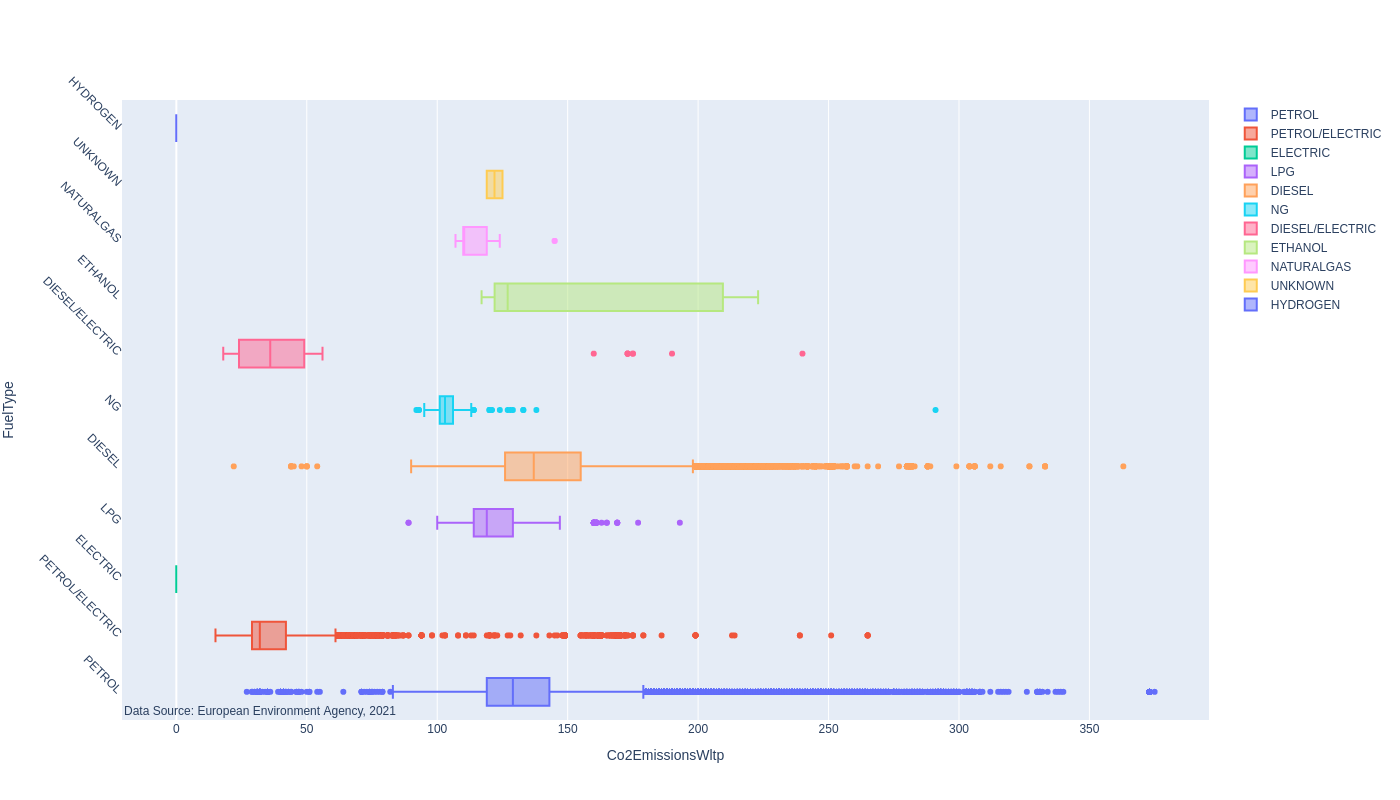

Saved static figure to output/figures/untitled_20240126_173400.png


In [22]:
co2.viz.plot_fueltype_distribution(df.sample(100000), interactive=False)

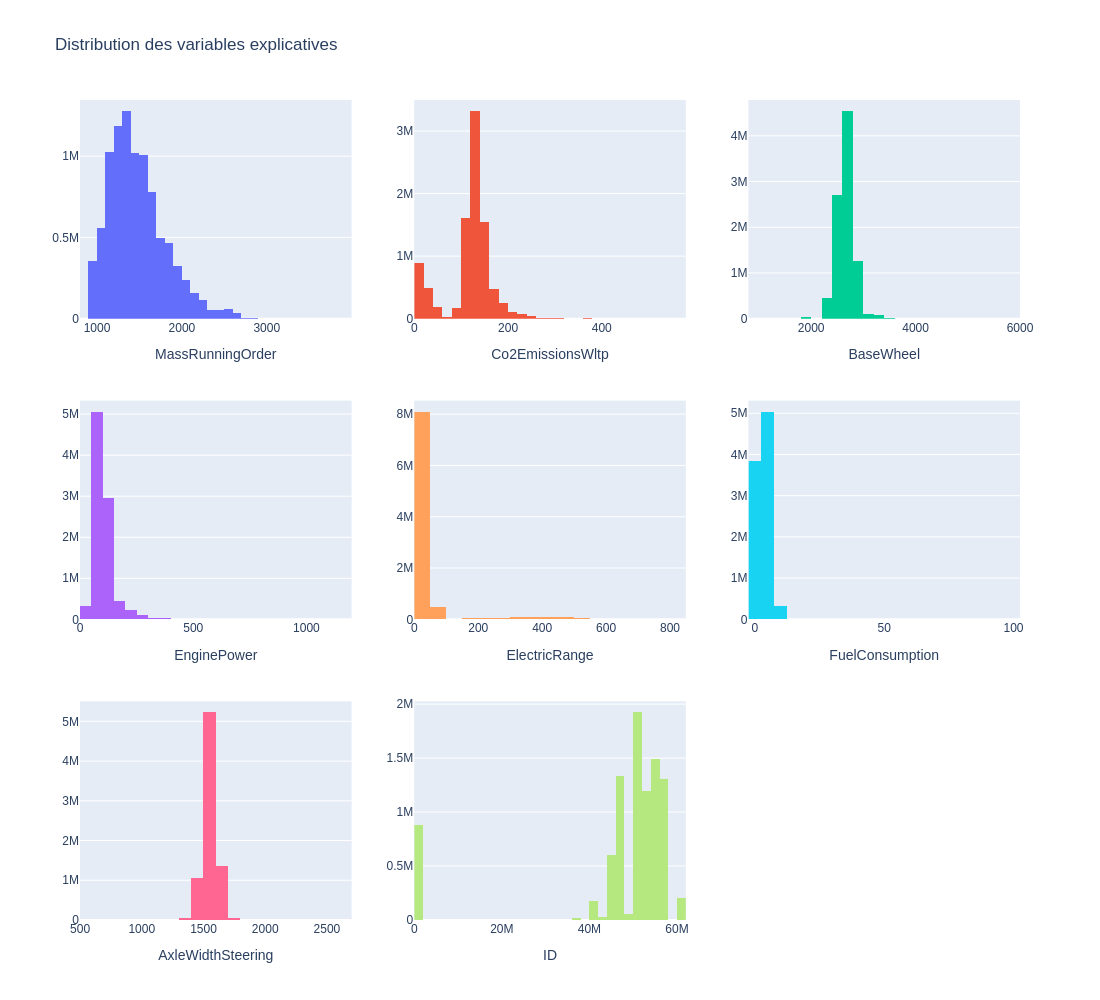

Saved static figure to output/figures/Distribution_des_variables_explicatives__20240126_173552.png


In [24]:
co2.viz.plot_feature_distributions(df, interactive=False)